### Genetic control system

A basic model for a genetic control system consists of two chemical species: the messenger RNA (mRNA) responsible for carrying a protein's blueprint from the DNA to the cell's protein factories, and the protein encoded by the mRNA that is the intended product of the transcription process.  In the control system, the generation of mRNA is stimulated by the presence of the protein via a sigmoidal function, resulting in a positive feedback loop.  We will assume that the protein concentration, $p$, and mRNA concentration, $m$, degrade with rates $k_1 p$ and $k_2 m$, respectively, while the presence of mRNA leads to the creation of protein with rate $k_3 m$.  The resulting equations for the protein and mRNA concentrations are
\begin{align}
\frac{dp}{dt} &= k_3 m - k_1 p \\
\frac{dm}{dt} &= h_1\frac{p^2}{H^2 + p^2} - k_2 m
\end{align}

#### Nondimensionalisation
We first nondimensionalise our system by writing
\begin{align}
p = Hu, m = h_1 v/k_2, t = \tau/k_2
\end{align}
where $u$, $v$, and $\tau$ are the nondimensional protein concentration, mRNA concentration, and time, respectively.  Substituting these expressions into the differential equations above yields the following system
\begin{align}
\frac{du}{d\tau} &= a v - b u, \\
\frac{dv}{d\tau} &= \frac{u^2}{1 + u^2} - v,
\end{align}
where $a = k_3h_1/(Hk_2^2)$ and $b = k_1/k_2$.  

#### Nullclines
The nullclines are given by the curves
\begin{align}
v &= (b/a) u, \\
v &= \frac{u^2}{1 + u^2}.
\end{align}
The nullclines can be plotted using the code below.  We see that they intersect provided $\alpha = b/a < 1/2$.  Can you identify the regions where $f_1$, $f_2$ are positive or negative and give some indication of the flow?

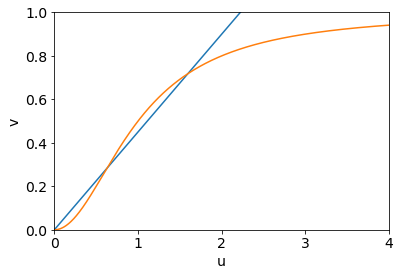

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

alpha = 0.45
u = np.linspace(0,4,1000)
v1 = alpha*u
v2 = u**2/(1+u**2)

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("u")
plt.ylabel("v")
plt.plot(u,v1)
plt.plot(u,v2)
plt.ylim(0,1)
plt.xlim(0,4);

#### Fixed points and their stability

We can determine the fixed points by finding the values of $u$ and $v$ where the nullclines intersect.  As $v =\alpha u$, this can be achieved by considering
\begin{align}
\alpha u &= \frac{u^2}{1 + u^2}.
\end{align}
We see that this equation is satisfied for $u = 0$.  To find the other intersections, we examine
\begin{align}
\alpha u^2 - u + \alpha &= 0,
\end{align}
which as roots
\begin{align}
u_{\pm} = \frac{1 \pm \sqrt{1 - 4\alpha^2}}{2\alpha}
\end{align}
As we noted above, there are only real roots, i.e. intersections of the nullclines, if $\alpha < 1/2$. From the fact that $v = \alpha u$ at the fixed points, we see that the fixed points are $(0,0)$ and $(u_{\pm}, v_{\pm})$, where 
\begin{align}
v_{\pm} = \frac{1 \pm \sqrt{1 - 4\alpha^2}}{2}.
\end{align}

To evaluate the stability of the fixed points, we compute the Jacobian, 
\begin{align}
J(u,v) = \left[\begin{array}{cc}
-b & a \\
 \frac{2u}{(1+u^2)^2} & -1
\end{array}\right].
\end{align}
Evaluting the Jacobian at $(0,0)$, we obtain
\begin{align}
J(0,0) = \left[\begin{array}{cc}
-b & a \\
 0 & -1
\end{array}\right],
\end{align}
whose characteristic equation is 
\begin{align}
(b + \lambda)(1 + \lambda) = 0.
\end{align}
Thus we see that $\lambda = -1$ and $\lambda = -b$ and consequently $(0,0)$ is a stable node.  

For the other fixed points, we first observe that for these fixed points, $\alpha(1+u_{\pm}^2) = u_{\pm}$, and as such, $2u_{\pm}/(1 + u^2_{\pm})^2 = 2\alpha^2/u_{\pm}$.  The Jacobian is then,

\begin{align}
J(u_{\pm},v_{\pm}) = \left[\begin{array}{cc}
-b & a \\
 2\alpha^2/u_{\pm} & -1
\end{array}\right],
\end{align}
whose characteristic equation is,
\begin{align}
\lambda^2 + (b + 1)\lambda + b\left(1 - \frac{2\alpha}{u_{\pm}}\right).
\end{align}
Substituting in the expression for $u_{\pm}$, the characteristic equation becomes
\begin{align}
\lambda^2 + (b + 1)\lambda \pm b\sqrt{1 - 4\alpha^2}.
\end{align}
Defining $\beta = \sqrt{1 - 4\alpha^2}$ and combined with the fact that $0 < \alpha < 1/2$, we have that $0 <\beta < 1$.  Let's first consider the fixed point $(u_-, v_-)$, which gives eigenvalues
\begin{align}
\lambda_{\pm} = \frac{-(b+1) \pm \sqrt{(b+1)^2 + 4b\beta}}{2}.
\end{align}
As $\sqrt{(b+1)^2 + 4b\beta} > (b+1)$, we have that both eigenvalues are real with $\lambda_+ > 0 > \lambda_-$.  Thus, $(u_-, v_-)$ is a saddle, and therefore unstable.

For the fixed point $(u_+, v_+)$, we have 
\begin{align}
\lambda_{\pm} = \frac{-(b+1) \pm \sqrt{(b+1)^2 - 4b\beta}}{2}.
\end{align}
As $(b+1)^2 - 4b\beta > (b - 1)^2 > 0$, we have that the eigenvalues are real.  Additionally, since $\sqrt{(b+1)^2 - 4b\beta} < (b+1)$, we have $\lambda_- < \lambda_+ < 0$.  Thus, the fixed point $(u_+, u_-)$ is a stable node.

We see that for $\alpha < 1/2$, we have a bistability with $(0,0)$ and $(u_+, v_+)$ being stable, while the `middle' fixed point $(u_-,v_-)$ is unstable.  The phase portrait can be generated numerically by running the following code:

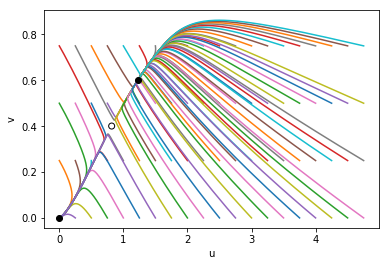

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint
import math

alpha = 0.49
b = 1
a = b/alpha

def du_dt(u, t):
    return [a*u[1] - b*u[0], u[0]**2/(1 + u[0]**2) - u[1]]

ts = np.linspace(0, 50, 1000)
icsu = np.arange(0.0, 5, 0.25)
icsv = np.arange(0.0, 1, 0.25)
for i in icsu:
    for j in icsv:
        u0 = [i, j]
        us = odeint(du_dt, u0, ts)
        protein = us[:,0]
        mRNA = us[:,1]
        plt.plot(protein,mRNA);

up = (1 + math.sqrt(1 - 4*alpha**2))/(2*alpha)
vp = alpha*up

um = (1 - math.sqrt(1 - 4*alpha**2))/(2*alpha)
vm = alpha*um


plt.plot(0,0,'ko');
plt.plot(up,vp,'ko');
plt.scatter(um,vm, edgecolor="black", color="none");        
        
plt.xlabel("u");
plt.ylabel("v");

#### Interpretation
We see that bistability indicates that depending on the intial concentrations of the protein and mRNA, protein production will go to zero, or the concentration of protein will be sustained at a level set by the system.  This provides a switching mechanism for the gene, which will turn on to sustain a sufficiently high concentration of the protein, or will remain off if the ambient protein concentration is too low.

We see something else that is interesting -- the situation is very similar to what we've observed for bistability in one dimensional systems with the $x$-axis replaced by the unstable manifold that connects the unstable fixed point with the two stable ones.  We see that trajectories rapidly approach the unstable manifold and flow nearly along it toward one of the stable fixed points.  Additionally, we'll see soon that the bifurcation that gives rise the fixed points $(u_{\pm}, v_{\pm})$ is very similar to what we have already encountered in one dimensional systems.

### Competition between populations 

Often in nature, multiple species compete for the same resources and as a result, the presence of one population impedes the growth of another.  Let's take the case of 2 species whose population sizes are $N_1$ and $N_2$, respectively.  In isolation, each population will evolve according to logistic growth.  When the other population is present, the death rate of a species will be proportional to the population size of the other species.  Accordingly, we have the following system
\begin{align}
\frac{dN_1}{dt} &= r_1N_1\left(1 - \frac{N_1}{K_1} - b_{12}\frac{N_2}{K_1}\right)\\
\frac{dN_2}{dt} &= r_2N_2\left(1 - \frac{N_2}{K_2} - b_{21}\frac{N_1}{K_2}\right)
\end{align}

#### Nondimensionalisation
We begin by nondimensionalising.  We nondimensionalise the system by expressing the population sizes and time as 
\begin{align}
N_1 = K_1 u_1, N_2 = K_2 u_2, \textrm{ and } t = \frac{1}{r_1}\tau,
\end{align}
where $u_1$ and $u_2$ are the nondimensional population sizes, and $\tau$ is the nondimensional time.  Substituting this into the original system, we have 
\begin{align}
\frac{du_1}{d\tau} &= u_1\left(1 - u_1 - a_{12}u_2\right),\\
\frac{du_2}{d\tau} &= \rho u_2\left(1 - u_2 - a_{21}u_1\right),
\end{align}
where $\rho = r_2/r_1$, $a_{12} = b_{12}K_2/K_1$, and $a_{21} = b_{21}K_1/K_2$. 

#### Nullclines
To find the nullclines, we consider
\begin{align}
u_1(1 - u_1 - a_{12}u_2) &= 0 
\end{align}
and
\begin{align}
\rho u_2(1 - u_2 - a_{21}u_1) &= 0,
\end{align}
separately.  In the first case, we see that the equation is satisfied along the lines $u_1 = 0$ and $u_1 = 1 - a_{12}u_2$.  The second equation is satisfied when $u_2 = 0$, or $u_2 = 1 - a_{21}u_1$.  We see that the slopes of the lines, and whether they intersect or not, depend on the values of $a_{21}$ and $a_{12}$.  In particular, we see that four cases can arise and these are shown in the sketches below.

\begin{figure}
\includegraphics{competitionnullclines1.png}
\end{figure}

\begin{figure}
\includegraphics{competitionnullclines2.png}
\end{figure}

We see that there are two cases where these two nullclines intersect, and two where they do not.  As the intersections are the fixed points, we see that varying $a_{21}$ and $a_{12}$ result in bifurcations.

#### Fixed points and their stability

By considering
\begin{align}
u_1(1 - u_1 - a_{12}u_2) &= 0 \\
\rho u_2(1 - u_2 - a_{21}u_1) &= 0,
\end{align}
simultaneously, we find that the fixed points are 
\begin{align}
u_1^* = 0, u_2^* = 0; u_1^* = 1, u_2^* = 0; u_1^* = 0, u_2^* = 1;\\
u_1^* = \frac{1-a_{12}}{1 - a_{12}a_{21}}, u_2^* = \frac{1-a_{21}}{1 - a_{12}a_{21}}. 
\end{align}

We can then go ahead an compute the Jacobian to find,
\begin{align}
J(u_1,u_2) = \left[\begin{array}{cc}
1 -2 u_1 - a_{12}u_2 & -a_{12}u_1 \\
-\rho a_{21}u_2 & \rho(1 - 2 u_2 -a_{21}u_1)
\end{array}\right].
\end{align}
Evaluating this at $(0,0)$, we obtain
\begin{align}
J(0,0) = \left[\begin{array}{cc}
1 & 0 \\
0 & \rho
\end{array}\right],
\end{align}
and thus, $(0,0)$ is an unstable node regardless of the parameter values.  This means that mass extinction is impossible -- there will always be a population, though the exact composition remains unclear as of yet.

Let's now take the fixed point $(1,0)$, for which the Jacobian is
\begin{align}
J(1,0) = \left[\begin{array}{cc}
-1 & -a_{12} \\
0 & \rho(1 - a_{21})
\end{array}\right],
\end{align}
which as eigenvalues $\lambda_1 = -1$ and $\lambda_2 = \rho(1 - a_{21})$.  Thus, the stability hinges on the magnitude of $a_{21}$.  If $a_{21} > 1$, then $(1,0)$ is a stable node, while if $a_{21} < 1$, $(1,0)$ is a saddle point and hence unstable.

Following very similar arguments for $(0,1)$, we have $\lambda_1 = -\rho$, and $\lambda_2 = 1 - a_{12}$ and consequently, $(0,1)$ is a stable node if $a_{12} > 1$ and saddle point if $a_{12} < 1$.  

Finally, for $u_1^* = (1-a_{12})/(1-a_{12}a_{21})$, and $u_2^*=(1-a_{21})/(1-a_{12}a_{21})$ the Jacobian is 
\begin{align}
J = (1 - a_{21}a_{12})^{-1}\left[\begin{array}{cc}
a_{12}-1 & a_{12}(a_{12}-1) \\
\rho a_{21}(a_{21} - 1) & \rho(a_{21} - 1)
\end{array}\right].
\end{align}
The eigenvalues are given by the lengthy expression
\begin{align}
\lambda_{1,2} = \frac{a_{12} - 1 + \rho(a_{21} - 1) \pm \sqrt{(a_{12} - 1 + \rho(a_{21} - 1))^2 - 4\rho(1 - a_{12}a_{21})(a_{12}-1)(a_{21}-1)}}{2(1-a_{12}a_{21})}.
\end{align}
Unfortunately, this expression is a bit challenging to examine at first glance, but after a bit of thought, the stability can be revealed.  First, we know that the fixed point exists only if $a_{12} >1$ and $a_{21} > 1$, or $a_{12} <1$ and $a_{21} < 1$.  Let's take $a_{12} <1$ and $a_{21} < 1$.  As a result, $a_{12} - 1 + \rho(a_{21} - 1) < 0$ and $1 - a_{12}a_{21} > 0$.  Additionally, we have that $0 < (a_{12} - 1 - \rho(a_{21} - 1))^2 < (a_{12} - 1 + \rho(a_{21} - 1))^2 - 4\rho(1 - a_{12}a_{21})(a_{12}-1)(a_{21}-1) < (a_{12} - 1 + \rho(a_{21} - 1))^2$.  Therefore, we know that both eigenvalues will be real and $\lambda_{1,2} < 0$.  The fixed point is then a stable-node for $a_{12} <1$ and $a_{21} < 1$.  

Now, if we consider $a_{12} >1$ and $a_{21} > 1$, we have that $a_{12} - 1 + \rho(a_{21} - 1) > 0$, however $1 - a_{12}a_{21} < 0$.  We also see that $0 < (a_{12} - 1 + \rho(a_{21} - 1))^2 < (a_{12} - 1 + \rho(a_{21} - 1))^2 - 4\rho(1 - a_{12}a_{21})(a_{12}-1)(a_{21}-1)$.  Accordingly, we see then that $\lambda_1 < 0 < \lambda_2$, revealing that the fixed point is a saddle if $a_{12} > 1$ and $a_{21} > 1$.

#### Phase portrait

With the fixed points and their stability established, we can combine this with what we know already about the nullclines to assemble a picture of the dynamics for the four different cases, as well as describe their ecological implications.

Before doing so, it's worth noting that along the lines $u_1 = 0$, $u_1 = U_1$, $u_2 = 0$ and $u_2 = U_2$, where constants $U_1, U_2 >1$ the vector $(f_1, f_2)$ points inward or along the boundary.  Hence the system is globally stable.

Now let's look more closely at the four cases, each of which can be considered numerically  using the code in the cell below.

\begin{enumerate}
\item $a_{12} < 1, a_{21}<1$: Here, both $(1,0)$ and $(0,1)$ are unstable, while the fourth fixed point, $(u_1^*, u_2^*)$, will be a stable-node.  Thus, we see that for this case, where mutual competition is sufficiently low, both species will coexist regardless of the initial populations.
\item $a_{12} > 1, a_{21}>1$: For this case, both $(1,0)$ and $(0,1)$ are stable, while the fourth fixed point, $(u_1^*, u_2^*)$, turns out to be a saddle point as $1 - a_{12}a_{21} < 0$.  Thus, trajectories will move towards either $(1,0)$ or $(0,1)$ depending on the initial condition.  The stable manifold for the saddle forms the separatrix, which is the boundary of the domains of attraction for $(1,0)$ and $(0,1)$.  Thus, where mutual competition is strong, only one population survives, while the other dies out, and which wins depends on the initial population sizes.
\item $a_{12} < 1, a_{21}>1$: In this case, we have $(1,0)$ is stable, while $(0,1)$ is unstable.  The fourth steady state does not exist, indicated by the fact that the nullclines do not intersect.  We see then that as a result of a disproportionate competition, where the presence of species 1 negatively affects species 2 so much so that species 2 becomes extinct regardless of the initial condition, and species 1 reaches its carrying capacity.  
\item $a_{12} > 1, a_{21}<1$: This case is the same as case 3, but with species 1 exchanged for species 2.  
\end{enumerate}

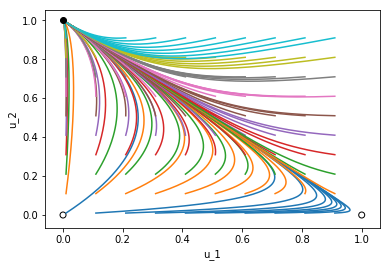

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint

rho,a12,a21 = 1,1.5,0.5

def du_dt(u, t):
    return [u[0]*(1 - u[0] - a12*u[1]), rho*u[1]*(1 - u[1] - a21*u[0])]

ts = np.linspace(0, 50, 1000)
ics = np.arange(0.01, 0.99, 0.1)
for i in ics:
    for j in ics:
        u0 = [i, j]
        us = odeint(du_dt, u0, ts)
        pop1 = us[:,0]
        pop2 = us[:,1]
        plt.plot(pop1,pop2);
        
plt.xlabel("u_1");
plt.ylabel("u_2");

plt.scatter(0,0, edgecolor="black", color="none");        

u1s = (1 - a12)/(1 - a12*a21);
u2s = (1 - a21)/(1 - a12*a21);

if a12 < 1:
    if a21 < 1:
        plt.scatter(1,0, edgecolor="black", color="none");  
        plt.scatter(0,1, edgecolor="black", color="none");  
        plt.plot(u1s,u2s,'ko');
    else:
        plt.plot(1,0,'ko');
        plt.scatter(0,1, edgecolor="black", color="none");  
else:
    if a21 > 1:
        plt.scatter(u1s,u2s, edgecolor="black", color="none");  
        plt.plot(1,0,'ko');
        plt.plot(0,1,'ko');
    else:
        plt.plot(0,1,'ko');
        plt.scatter(1,0, edgecolor="black", color="none");  
        

#### Interpretation

A rather striking feature of this model is that 3 of the 4 cases described above result in exinction of one of the species!  The exinction of one population due to competition with another is known as the *principle of competitive exclusion*.  In our model, we see that whether this occurs or not depends on the groups $a_{12} = b_{12}K_2/K_1$ and $a_{21} = b_{21}K_1/K_2$, and hence the competition coefficients and carrying capacities.  Consider a population of large animals, $N_1$, and a population of smaller animals, $N_2$, that compete for the same food source, such as grass in a fixed area.  Suppose that $b_{21} = b_{12}$.  As the carrying capacity of the land is lower for the larger animals, we have that $K_1 < K_2$, and as a result $a_{12} > a_{21}$.  We can imagine then that we may encounter $a_{12} > 1$ and $a_{21} < 1$, which will result in the extinction of the larger animals leaving the smaller animal population to flourish. 

### Predator-Prey systems

In our final example, we will examine multi-species population dynamics through the classic **Lotka-Volterra** system for a predator-prey system that was originally developed by Volterra in 1926 to explain the oscillatory levels of certain fish catches in the Adriatic.  Let the population size of prey be given by $N(t)$ and $P(t)$ be the size of the predator population.  The Lotka-Volterra system is 
\begin{align}
\frac{dN}{dt} &= aN - bNP,\\
\frac{dP}{dt} &= -dP + cNP.
\label{eq:LVsys}
\end{align}
where $a$, $b$, $c$, and $d$ are positive constants.  We see that in the absence of interactions ($b=c=0$), the prey population will grow exponentially with birth rate $aN$, while the predator population size will shrink exponentially with death rate $-dP$.  The interactions between the populations will allow the predator population to grow at rate $cNP$, while the prey population decreases with rate $-bNP$.  

The reason that this is called the Lotka-Volterra system rather than just the Volterra system is that Lotka derived the same set of equations to explain oscillations appearing in a chemical system.  Using the law of mass action, show that the reaction
\begin{align}
A + X \xrightarrow{k_1} 2X, X+Y\xrightarrow{k_2} 2Y, Y \xrightarrow{k_3}B
\end{align}
with constant concentration of $A$, $a$, yields the Lotka-Volterra system.

#### Nondimensionalisation

Let's go ahead an nondimensionalise our system through
\begin{align}
N = \frac{d}{c} u, P = \frac{a}{b} v, \textrm{ and } t = \frac{1}{a}\tau
\end{align}
where $u$ is the nondimensional prey population size, $v$ is the nondimensional predator population size, and $\tau$ is nondimensional time.  Substituting these expressions into \eqref{eq:LVsys}, we obtain
\begin{align}
\frac{du}{d\tau} &= u(1 - v), \\
\frac{dv}{d\tau} &= \alpha v(u - 1).
\end{align}

#### Fixed points and their stability

Examining the right hand side reveals that there are two fixed points, $u = v = 0$, and $u = v = 1$.  To characterise their stability, we compute the Jacobian,
\begin{align}
J(u,v) = \left[ \begin{array}{cc}
1 - v & -u \\
\alpha v & \alpha(u - 1)
\end{array}\right]
\end{align}
and evaluating it at $u = v = 0$, we see that 
\begin{align}
J(0,0) = \left[ \begin{array}{cc}
1  & 0 \\
0 & -\alpha
\end{array}\right].
\end{align}
Conveniently, there is no need to diagonalise and we see immediately that since $\alpha > 0$, we have that the origin in the $uv$-plane is a saddle point and as a consequence, unstable.  The Jacobian evaluated at $(1,1)$ gives
\begin{align}
J(1,1) = \left[ \begin{array}{cc}
0  & -1 \\
\alpha & 0
\end{array}\right].
\end{align}
This one we'll need to diagonalise, but upon doing so, we see that $\lambda_{1,2} = \pm i \sqrt{\alpha}$.  Thus, $(1,1)$ is a centre whose stability is marginal and typically cannot be determined from linear analysis alone (notice that the stability theorem says nothing about this case!). 

#### Analytical solution 

In this case, the analytical solution for the phase plane trajectories is possible.  If we consider $dv/d\tau = (dv/du)(du/d\tau)$, we obtain the separable equation
\begin{align}
\frac{dv}{du} = \alpha\frac{v(u - 1)}{u(1 - v)},
\end{align}
which upon integration yields the family of curves
\begin{align}
\alpha u + v - \log (u^\alpha v) = H,
\end{align}
where $H$ is the constant of integration whose exact value will depend upon the initial conditions.  The phase portrait is plotted below for different initial conditions.  The second figure shows the populations as a function of time.

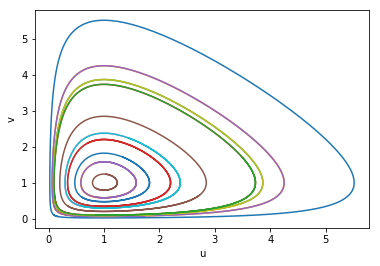

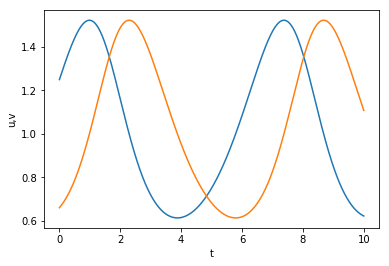

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint

alpha = 1;

def du_dt(u, t):
    return [u[0]*(1 - u[1]), alpha*u[1]*(u[0] - 1)]

ts = np.linspace(0, 10, 1000)
ics = np.arange(0.1, 0.9, 0.25)
for i in ics:
    for j in ics:
        u0 = [i, j]
        us = odeint(du_dt, u0, ts)
        pop1 = us[:,0]
        pop2 = us[:,1]
        plt.figure(0)
        plt.plot(pop1,pop2);
        
plt.xlabel("u");
plt.ylabel("v");

u0 = [1.25, 0.66]
us = odeint(du_dt, u0, ts)
pop1 = us[:,0]
pop2 = us[:,1]
plt.figure(1)
plt.plot(ts,pop1)
plt.plot(ts,pop2);
plt.xlabel("t");
plt.ylabel("u,v");

The solution shows that the oscillatory behaviour occuring close to the fixed point persists further away, and in fact, there are many closed orbits surrounding the centre.  We see that Volterra was successful in producing a model that gives oscillations, however, its not without its flaws!  Changing the initial condition is equivalent to varying the constant $H$ that define each of the orbits.  In terms of the biology, this implies a couple of things: 1. there is no natural oscillation in the population levels -- different initial population sizes yield different oscillations and 2. this causes strange, unnatural things to occur, such as lowering the initial population of predators resulting in larger peaks in their population size.

There are also deficiencies from a mathematical perpspective.  This model is what is known as *structurally unstable* a property which is linked to the neutral stability of the centre fixed point.  Namely, a perturbation in the equation itself will lead to a drastic change in the nature of the solution.  In this case, the slightest bit of damping will change the centres to stable spirals by creating a small, but non-zero, real eigenvalue.  

We'll come to the resolution of these issues in the next section when we discuss oscillations and see that both the biological and mathematical issues can be resolved by introducing a more realistic population dynamics through logistic growth.